In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Dataset

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#no. of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
#Lets check if any null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploration

In [9]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

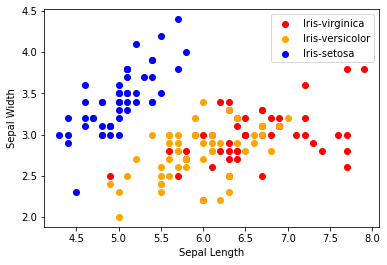

In [10]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

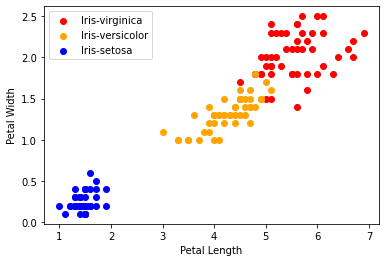

In [11]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

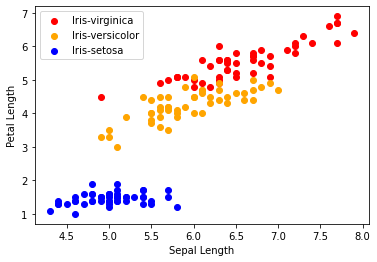

In [12]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

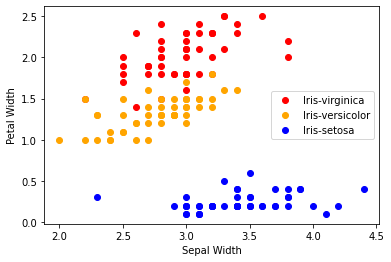

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

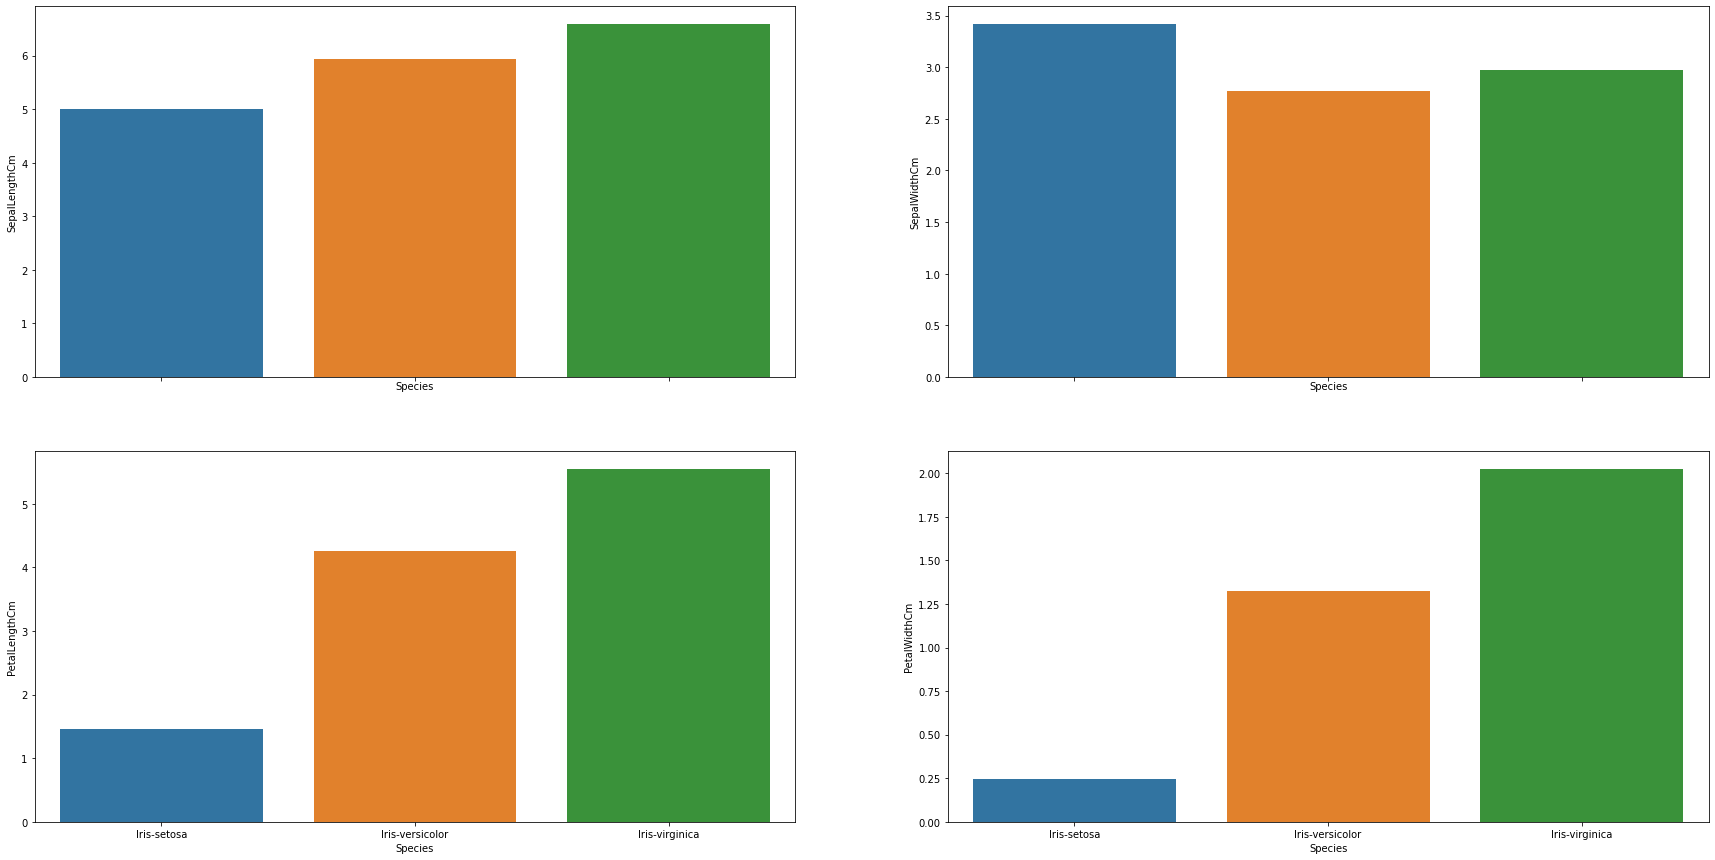

In [14]:
f, axes = plt.subplots(2,2, figsize=(30, 15), sharex=True)


sns.barplot('Species','SepalLengthCm',data = df,ci= None,ax=axes[0,0])
sns.barplot('Species','SepalWidthCm',data = df,ci= None,ax=axes[0,1])

sns.barplot('Species','PetalLengthCm',data = df,ci= None,ax=axes[1,0])
sns.barplot('Species','PetalWidthCm',data = df,ci= None, ax=axes[1, 1])

# Correlation matrix

<AxesSubplot:>

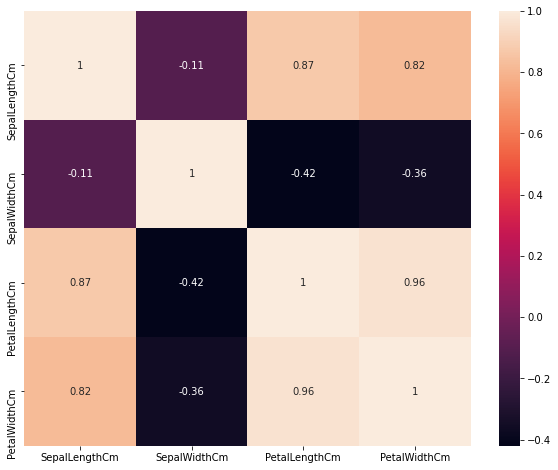

In [15]:
corrmat = df.corr()
f = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, xticklabels = corrmat.columns , yticklabels = corrmat.columns , annot =True)

# Label encoding the species column

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.tail(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2


# Preparing the dataset

In [17]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

# Normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

Normalized Dataset

In [45]:
print(X_train)

[[0.64705882 0.33333333 0.61016949 0.58333333]
 [0.70588235 0.20833333 0.81355932 0.70833333]
 [0.73529412 0.41666667 0.76271186 0.83333333]
 [0.23529412 0.625      0.06779661 0.08333333]
 [0.5        0.08333333 0.6779661  0.58333333]
 [0.58823529 0.375      0.77966102 0.70833333]
 [0.67647059 0.375      0.61016949 0.5       ]
 [1.         0.25       1.         0.91666667]
 [0.41176471 0.75       0.11864407 0.08333333]
 [0.20588235 0.66666667 0.06779661 0.04166667]
 [0.14705882 0.41666667 0.06779661 0.08333333]
 [0.26470588 0.29166667 0.49152542 0.54166667]
 [0.23529412 0.58333333 0.08474576 0.04166667]
 [0.35294118 0.625      0.05084746 0.04166667]
 [1.         0.75       0.96610169 0.875     ]
 [0.76470588 0.45833333 0.74576271 0.83333333]
 [0.88235294 0.375      0.89830508 0.70833333]
 [0.61764706 0.33333333 0.77966102 0.875     ]
 [0.55882353 0.33333333 0.6440678  0.70833333]
 [0.5        0.58333333 0.59322034 0.625     ]
 [1.         0.33333333 0.96610169 0.79166667]
 [0.41176471 

# Building the ANN

In [46]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=50,input_shape=(4,) ,activation='relu')) #Input Lyaer and Hidden layer
ann.add(tf.keras.layers.Dense(units=50,input_shape=(4,), activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))  #Output Layer
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
ann.fit(X_train, y_train, batch_size =32, epochs = 100) 

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0516 - accuracy: 0.6964
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0171 - accuracy: 0.6875
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9875 - accuracy: 0.6875
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9575 - accuracy: 0.6875
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9324 - accuracy: 0.6875
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9056 - accuracy: 0.6964
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8768 - accuracy: 0.6964
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.6964
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8141 - accuracy: 0.6964
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7808 - accuracy: 0.6964
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9554
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9464
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9554
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9554
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9554
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9554
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9554
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9554
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9554
Epoch 93/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9554
Epoch 94/100
4/4 [===============

In [49]:
ann.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9737


[0.06621947884559631, 0.9736841917037964]

In [66]:
y_pred = ann.predict(X_test)

In [68]:
p = np.argmax(y_pred,axis=1)
print("Predicted values- {}".format(p[0:10]))
print("Test values- {}".format(y_test[0:10]))

Predicted values- [0 1 1 0 2 1 2 0 0 2]
Test values- [0 1 1 0 2 1 2 0 0 2]


In [77]:
print("Accuracy : {} %".format((accuracy_score(y_test, p))*100))

Accuracy : 97.36842105263158 %
